In [1]:
!uname -a

Linux compute-0-7.local 2.6.32-642.el6.x86_64 #1 SMP Tue May 10 17:27:01 UTC 2016 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
!pwd

/home/tallam/plasticc/snmachine/examples


In [3]:
!pip install ../.

Processing /home/tallam/plasticc/snmachine
  Running setup.py bdist_wheel for snmachine ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-lfypdgk_/wheels/cd/65/db/fda56ff3f0d6fa8ba1e7b69dab8a17be3a2bbe7940a42d6151
Successfully built snmachine
  Found existing installation: snmachine 1.1.1
    Uninstalling snmachine-1.1.1:
      Successfully uninstalled snmachine-1.1.1


# Inspect light curves for different cadences

`snmachine` imports

In [6]:
%%capture --no-stdout 
#I use this to supress unnecessary warnings for clarity
%load_ext autoreload
%autoreload #Use this to reload modules if they are changed on disk while the notebook is running
from snmachine import sndata, snfeatures, snclassifier, tsne_plot
import numpy as np
import matplotlib.pyplot as plt
import time, os, pywt,subprocess
from sklearn.decomposition import PCA
from astropy.table import Table,join,vstack,unique
from astropy.io import fits
import sklearn.metrics 
import sncosmo
import pickle
%matplotlib nbagg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Set the number of processes you want to use throughout the notebook
import multiprocessing
num_cpu = multiprocessing.cpu_count()
nproc=num_cpu
print("Running with {} cores".format(num_cpu))

Running with 12 cores


## Initialise dataset object

Function to write light curves to csv

In [9]:
def light_curves_to_csv(cadence_data, cadence_name, objectname):
    
    lc_pandas = cadence_data.data[str(objectname)].to_pandas()
    lc_pandas_dropped_cols = lc_pandas.drop(columns=['zp', 'zpsys'])
    lc_pandas_dropped_cols.to_csv("{}_{}.csv".format(cadence_name, objectname))

### `kraken_2026` DDF

In [10]:
# Please specify Data root, 
# the path to where you have pulled all the data from
rt='/share/hypatia/snmachine_resources/data/cwp/DDFY10/RH_kraken_2026_ddf_DDF_1aONLY_Y10_G10/'
prefixIa='RH_DDF_1aONLY_Y10_G10_Ia-'
prefixNONIa='RH_DDF_1aONLY_Y10_G10_NONIa-'
# Name for the dataset
dataset='kraken_2026_ddf_Y10'
kraken_2026_ddf=sndata.LSSTCadenceSimulations(folder=rt,prefix_Ia=prefixIa, prefix_NONIa=prefixNONIa, indices=range(1,2))
#dat=sndata.plasticc_data(folder=rt,pickle_file='dataset_full.pickle',from_pickle=True)

Reading data...
chunk 01
0k
10k
17038 objects read into memory.


Now we can plot all the data and cycle through it (left and right arrows on your keyboard) to choose the light curve we want to write to csv

<IPython.core.display.Javascript object>


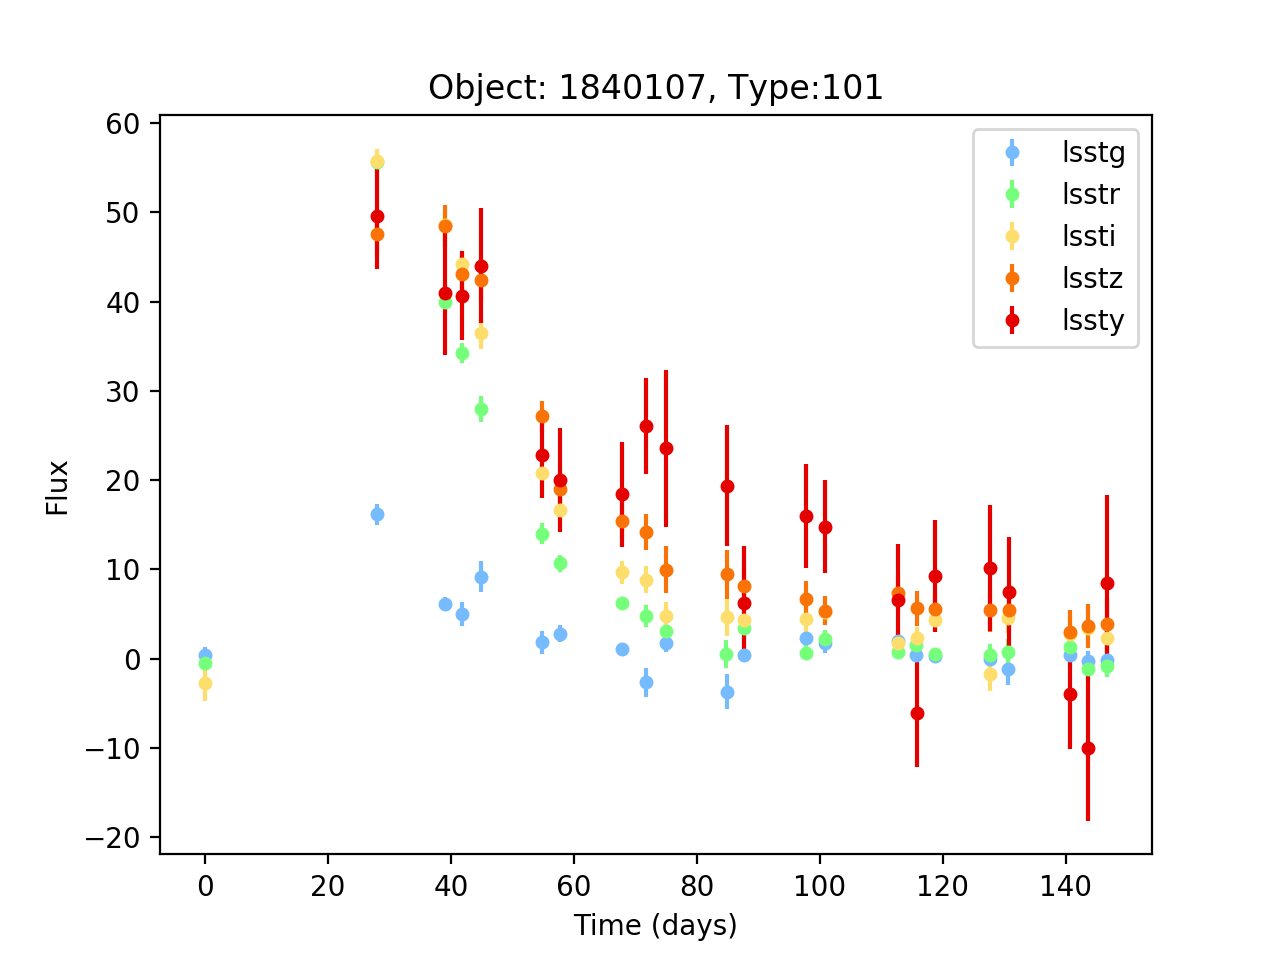

In [20]:
kraken_2026_ddf.plot_all(mix=True, sep_detect=False)

Write chosen light curve to csv

In [12]:
# light_curves_to_csv(kraken_2026_ddf, "kraken_2026_ddf", 1897455)

### `kraken_2026` WFD

In [13]:
# Please specify Data root, 
# the path to where you have pulled all the data from
rt='/share/hypatia/snmachine_resources/data/cwp/WFDY10/RH_kraken_2026_wfd_WFD_1aONLY_Y10_G10/'
prefixIa='RH_WFD_1aONLY_Y10_G10_Ia-'
prefixNONIa='RH_WFD_1aONLY_Y10_G10_NONIa-'
# Name for the dataset
dataset='kraken_2026_wfd_Y10'
kraken_2026_wfd=sndata.LSSTCadenceSimulations(folder=rt,prefix_Ia=prefixIa, prefix_NONIa=prefixNONIa, indices=range(1,2))
#dat=sndata.plasticc_data(folder=rt,pickle_file='dataset_full.pickle',from_pickle=True)

Reading data...
chunk 01
0k
10k
20k
30k
40k
50k
60k
70k
80k
90k
100k
110k
120k
130k
140k
150k
160k
170k
175642 objects read into memory.


<IPython.core.display.Javascript object>


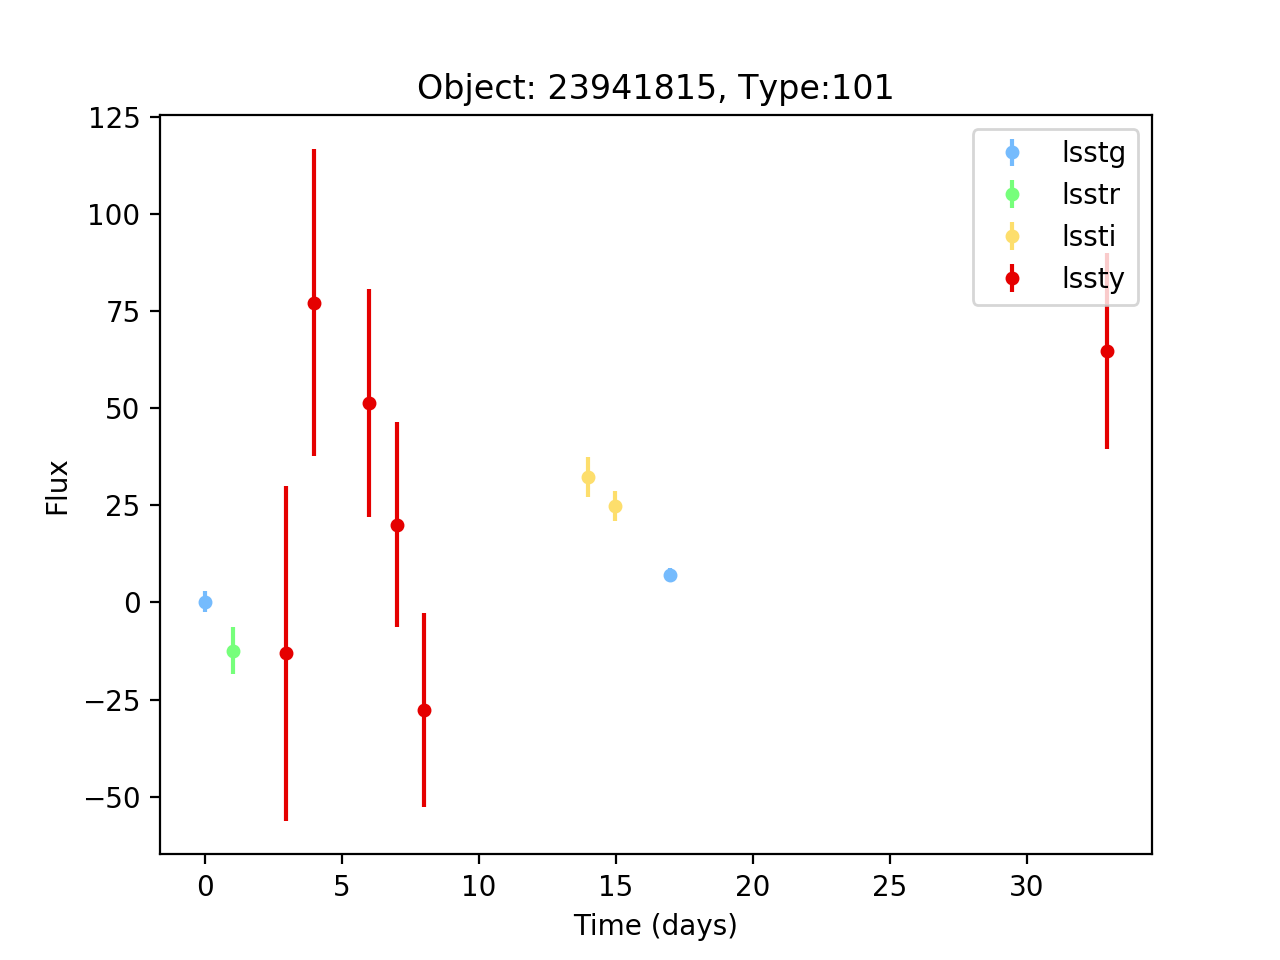

In [26]:
kraken_2026_wfd.plot_all(mix=False, sep_detect=False)

In [24]:
light_curves_to_csv(kraken_2026_wfd, "kraken_2026_wfd", 72779215)

### `pontus_2002` WFD

In [16]:
# Please specify Data root, 
# the path to where you have pulled all the data from
rt='/share/hypatia/snmachine_resources/data/cwp/WFDY10/RH_pontus_2002_wfd_WFD_1aONLY_Y10_G10/'
prefixIa='RH_WFD_1aONLY_Y10_G10_Ia-'
prefixNONIa='RH_WFD_1aONLY_Y10_G10_NONIa-'
# Name for the dataset
dataset='pontus_2002_wfd_Y10'
pontus_2002=sndata.LSSTCadenceSimulations(folder=rt,prefix_Ia=prefixIa, prefix_NONIa=prefixNONIa, indices=range(1,2))
#dat=sndata.plasticc_data(folder=rt,pickle_file='dataset_full.pickle',from_pickle=True)

Reading data...
chunk 01
0k
10k
20k
30k
40k
50k
60k
70k
80k
90k
100k
110k
120k
130k
138633 objects read into memory.


<IPython.core.display.Javascript object>


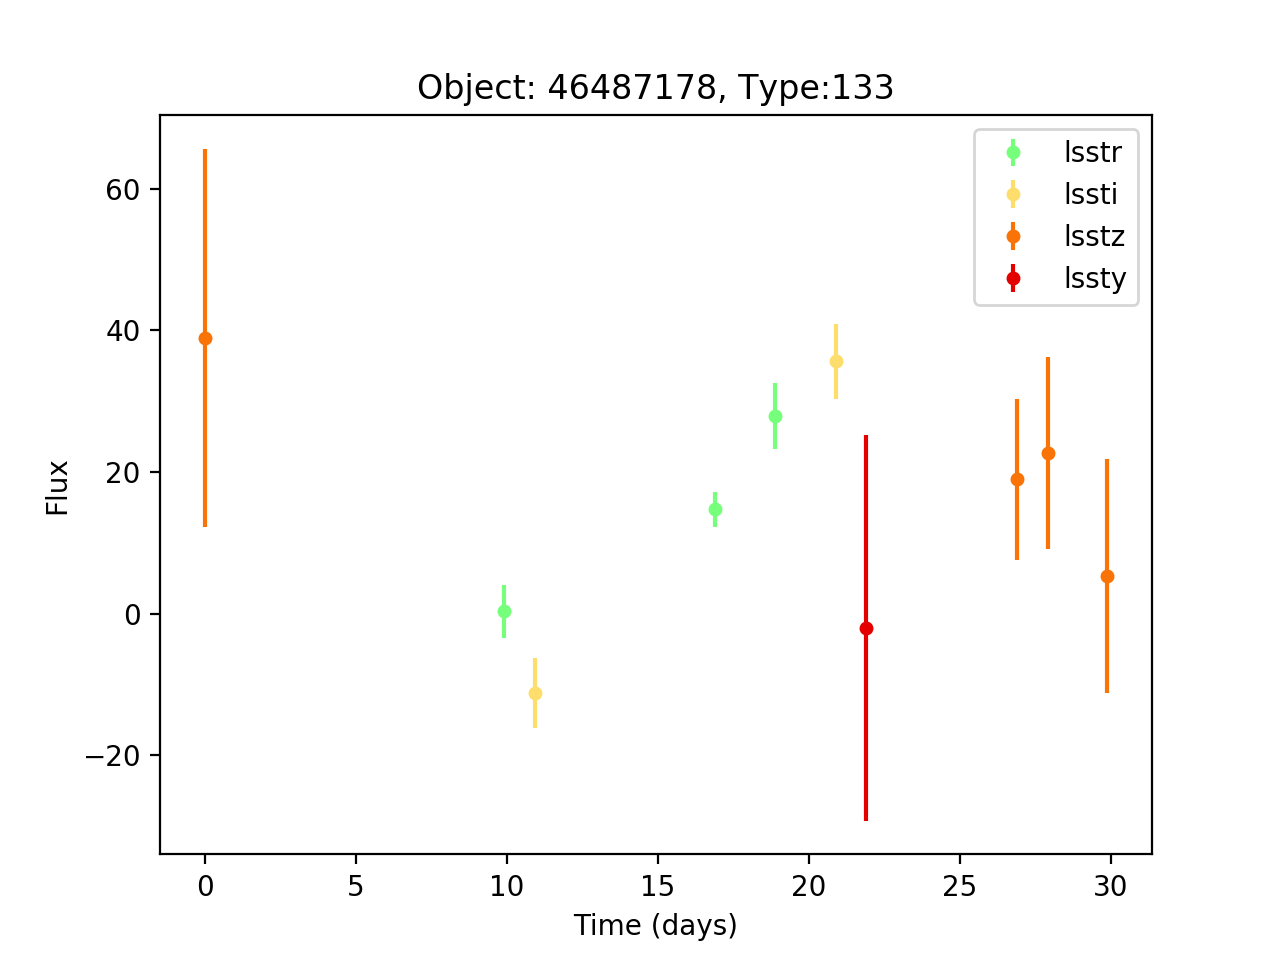

In [27]:
pontus_2002.plot_all(mix=True, sep_detect=False)

In [18]:
# light_curves_to_csv(pontus_2002, "pontus_2002", 1897455)

### `pontus_2489` WFD

In [19]:
# Please specify Data root, 
# the path to where you have pulled all the data from
rt='/share/hypatia/snmachine_resources/data/cwp/WFDY10/RH_pontus_2489_wfd_WFD_1aONLY_Y10_G10/'
prefixIa='RH_WFD_1aONLY_Y10_G10_Ia-'
prefixNONIa='RH_WFD_1aONLY_Y10_G10_NONIa-'
# Name for the dataset
dataset='pontus_2489_wfd_Y10'
pontus_2489=sndata.LSSTCadenceSimulations(folder=rt,prefix_Ia=prefixIa, prefix_NONIa=prefixNONIa, indices=range(1,2))
#dat=sndata.plasticc_data(folder=rt,pickle_file='dataset_full.pickle',from_pickle=True)

Reading data...
chunk 01
0k
10k
20k
30k
40k
50k
60k
70k
80k
90k
100k
110k
120k
130k
140k
150k
159825 objects read into memory.


<IPython.core.display.Javascript object>


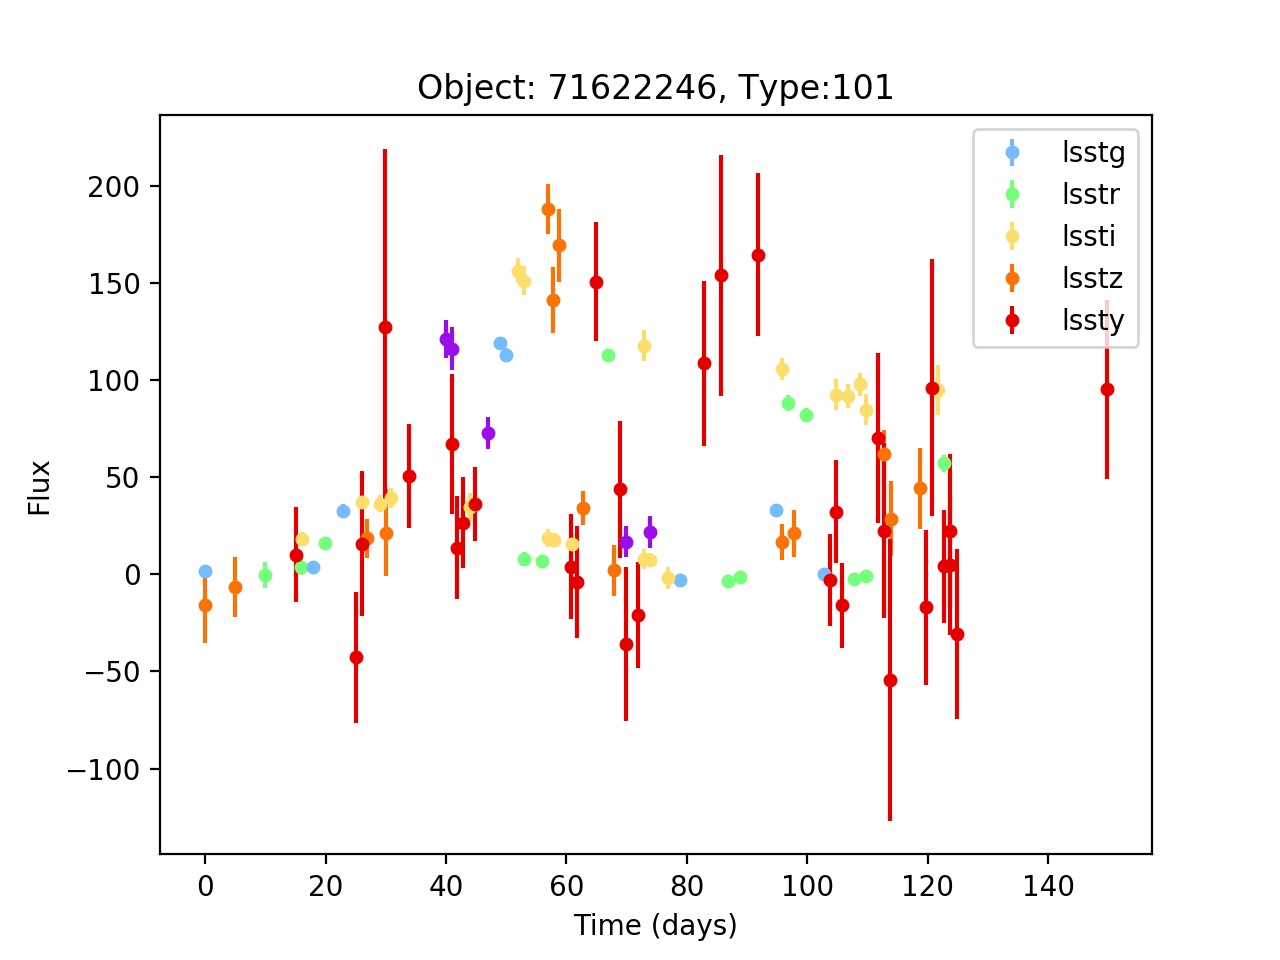

In [23]:
pontus_2489.plot_all(mix=True, sep_detect=False)

In [ ]:
# light_curves_to_csv(pontus_2489, "pontus_2489", 1897455)

### `alt_sched` WFD

In [ ]:
# alt_sched.plot_all(mix=True, sep_detect=False)

In [ ]:
# light_curves_to_csv(alt_sched, "alt_sched", 1897455)